In [1]:
import csv,sys,os
import argparse
from math import sqrt
from pprint import pprint
import numpy as np
import fitsio
import matplotlib.pyplot as plt
from pandas import DataFrame
import pdb
import pylab as py
from matplotlib import gridspec


In [2]:
from dither_plot import *

In [3]:
seqlist = [30180,30156,30148,30140,30136,30132]
gfaseqlist = [30179,30155,30147,30139,30135,30131]
obsday,petalnum,channel = '20191126','2',b'B'
tilecsvfile = '5n1arcsec_dither_assignment_diff_63068.csv'
facsvfile = '/n/home/desiobserver/sarahE/20191126/'+tilecsvfile

In [8]:
pwd()

'/n/home/desiobserver/dithertest'

/n/home/desiobserver/dithertest/dither_plot.py:68: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if ((df[df['snr']>0.5].size >0) & (df[df['snr']>0.5][df['r']<225].size >0)) :
/n/home/desiobserver/dithertest/dither_plot.py:75: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['snr']>.5][df['r']<225].plot(kind='scatter', x='dra', y='ddec', color='red', ax=ax)


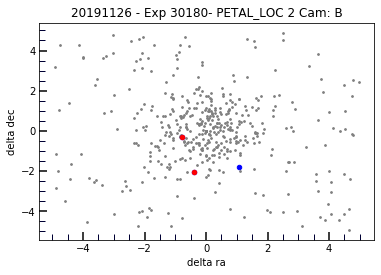

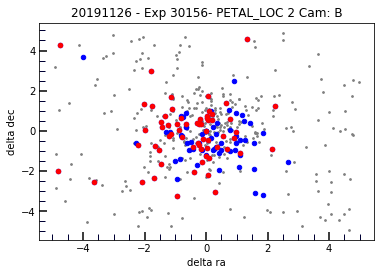

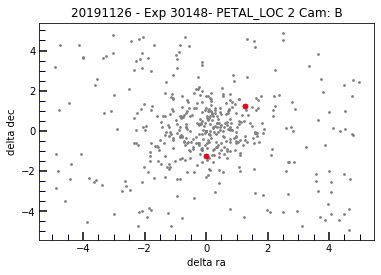

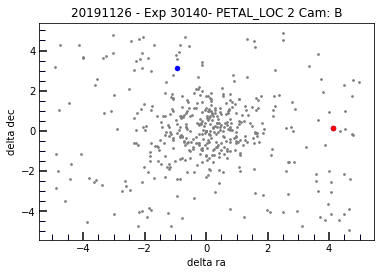

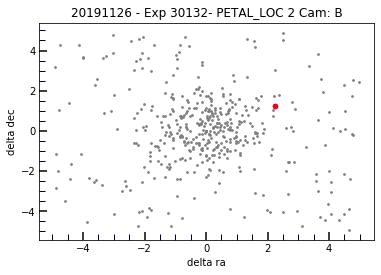

In [9]:
grokdither(seqlist,obsday,petalnum,channel,facsvfile)

/uufs/chpc.utah.edu/common/home/bolton-group1/bolton_data2/kdawson/sarahE/cmx/DITHERING/dither_plot.py:179: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if ((df[df['snr']>snr_thresh].size >0) & (df[df['snr']>snr_thresh][df['r']<225].size >0)) :
/uufs/chpc.utah.edu/common/home/bolton-group1/bolton_data2/kdawson/sarahE/cmx/DITHERING/dither_plot.py:187: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['snr']>snr_thresh][df['r']<225].plot(kind='scatter', x='dra', y='ddec', color='red', ax=ax)


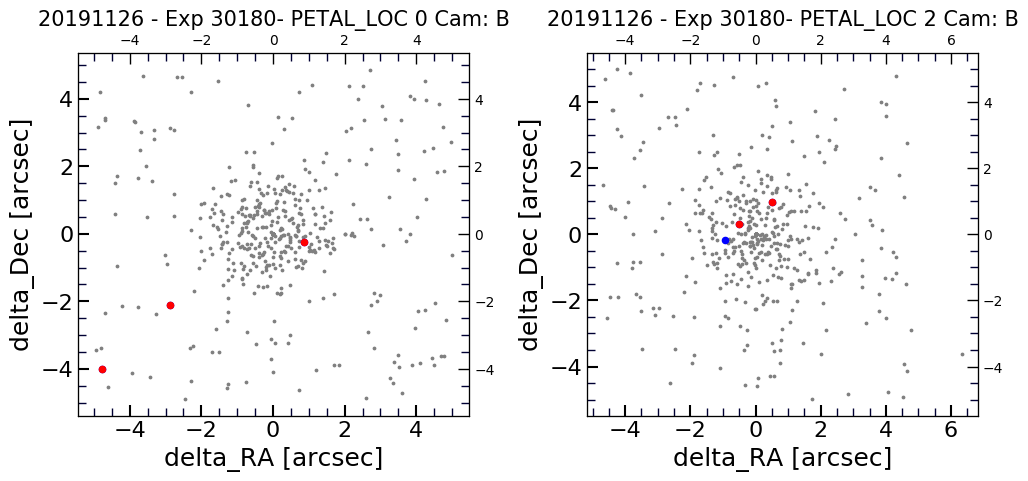

_________________________________________________________________________________



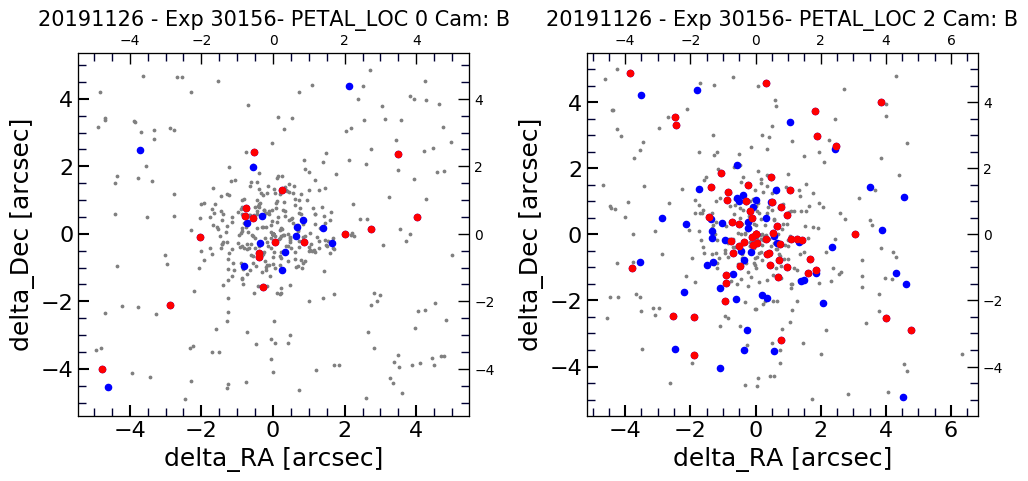

_________________________________________________________________________________



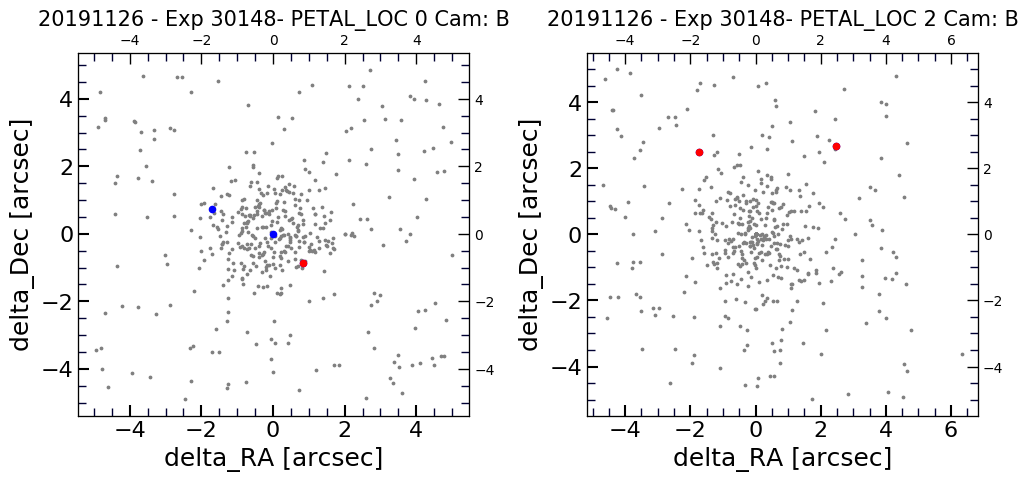

_________________________________________________________________________________



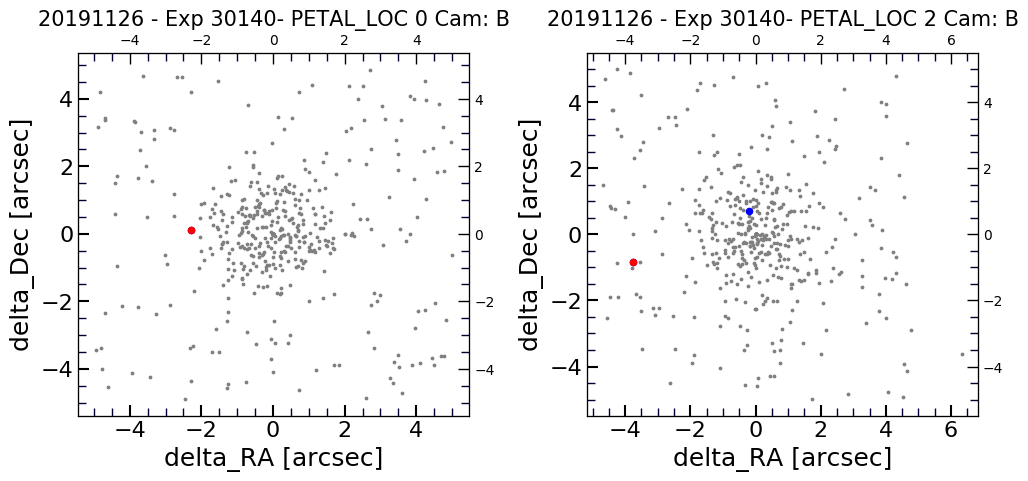

_________________________________________________________________________________

None of the fibers in qa-00030136.fits have landed on a source (snr >0.5) in petal 2


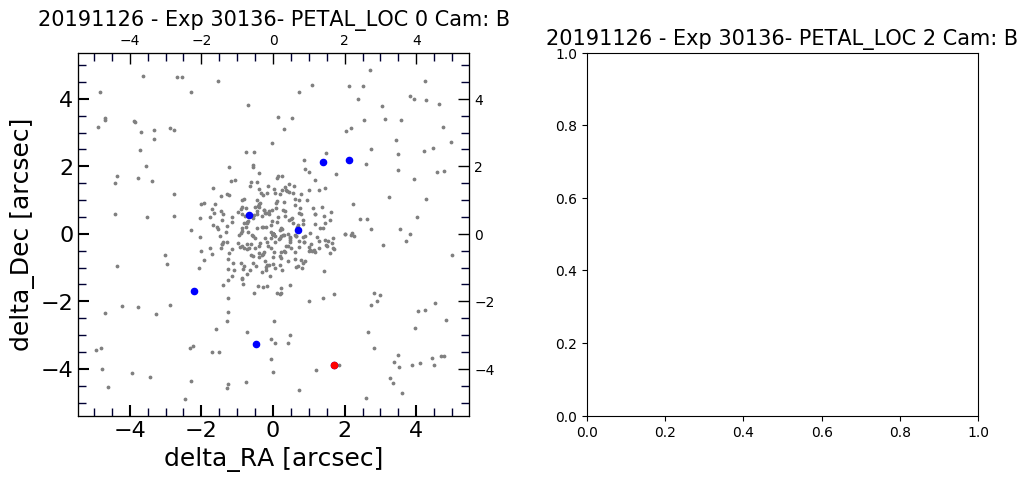

_________________________________________________________________________________

None of the fibers in qa-00030132.fits have landed on a source (snr >0.5) in petal 0


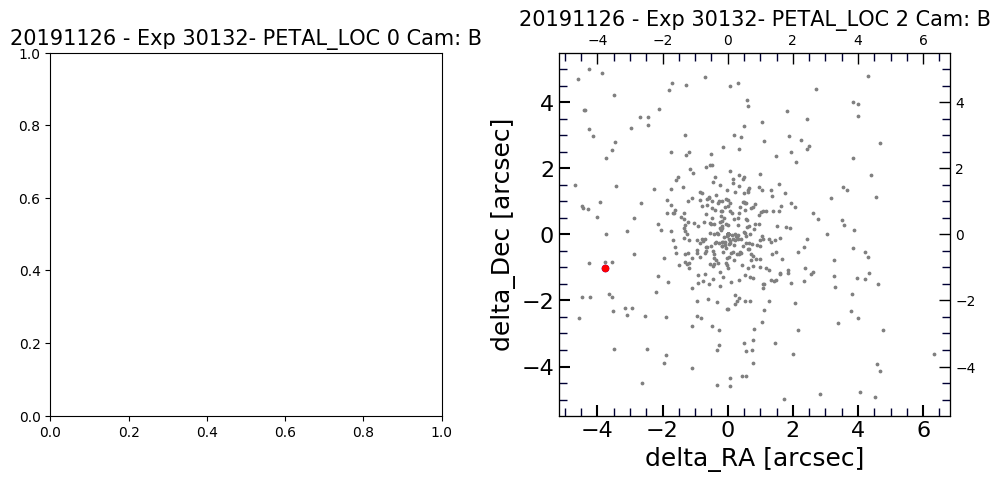

_________________________________________________________________________________



In [6]:
### plot_dither_seq() in dither_plot.py does not use csv file. It uses the raw fiberassign output

tileid,obsday,petalnum_list,channel = 63068,'20191126',[0,2],b'B' 
nightwatch_dir='/exposures/nightwatch/'
fiberassign_dir = '/data/tiles/ALL_tiles/20191119/'
plotout_dir = './'
snr_thresh=0.5
seqlist = [30180,30156,30148,30140,30136,30132]


plot_dither_seq(seqlist, obsday, petalnum_list, channel, tileid, nightwatch_dir, fiberassign_dir, plotout_dir, snr_thresh)


gfaseqlist is a set of GFA exposures matched to the spectrograph exposures in seqlist (possibly the same seqlist as you specified above)<br>
refexpidx is the index of the gfa exposure in gfaseqlist that is at the starting position of the dither sequence. deltara,deltadec are computed relative to the RA,Dec (TARGETRA,TARGETDEC) of the telescope pointing during exposure <br>
I believe the deltas relative to the reference exposure will be correct even if we are moving the ADCs for the acquisition as long as we don't change it during the dither script

In [11]:
from astropy.io import fits

In [51]:
def getdradecfromgfaexp(gfaseqlist,seqlist, refexpidx,obsdate):
    reffilename = '/exposures/desi/' + obsdate + '/' + '{:08d}'.format(gfaseqlist[refexpidx]) + '/gfa-' + '{:08d}'.format(gfaseqlist[refexpidx]) + '.fits.fz'
    refhdul = fits.open(reffilename)
    refra = refhdul['GFA'].header['TARGTRA']
    refdec = refhdul['GFA'].header['TARGTDEC']
    for i in range(len(gfaseqlist)):
        filename = '/exposures/desi/' + obsdate + '/' + '{:08d}'.format(gfaseqlist[i]) + '/gfa-' + '{:08d}'.format(gfaseqlist[i]) + '.fits.fz'
        hdul = fits.open(filename)
        raval = hdul['GFA'].header['TARGTRA']
        decval = hdul['GFA'].header['TARGTDEC']
        dra = (raval-refra)*3600
        ddec = (decval - refdec)*3600
        print('Spec expid ' + str(seqlist[i]) + ' GFA expid ' + str(gfaseqlist[i]) + ' deltaRA ' + '{:8f}'.format(dra) + ' deltaDec ' + '{:8f}'.format(ddec))
    
        

In [63]:
gfaseqlist = [30155,30147,30139,30135,30131]
seqlist = [30156,30148,30140,30136,30132]
refexpidx = 4
print('reference exposure')
print(str(gfaseqlist[refexpidx]))

reference exposure
30131


In [64]:
getdradecfromgfaexp(gfaseqlist,seqlist,refexpidx,'20191126')

Spec expid 30156 GFA expid 30155 deltaRA 11.696400 deltaDec 0.003600
Spec expid 30148 GFA expid 30147 deltaRA -11.692800 deltaDec 0.000000
Spec expid 30140 GFA expid 30139 deltaRA 0.000000 deltaDec 10.000800
Spec expid 30136 GFA expid 30135 deltaRA 11.692800 deltaDec 10.000800
Spec expid 30132 GFA expid 30131 deltaRA 0.000000 deltaDec 0.000000
